<a href="https://colab.research.google.com/github/eliasakalu/ICogLabs_AI_Projects/blob/main/Classification_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎯 MINI PROJECT — Binary Classification**

Create dataset:

Example:

Exam score → Pass (1) / Fail (0)
| Score | Pass |
| ----- | ---- |
| 40    | 0    |
| 50    | 0    |
| 60    | 1    |
| 70    | 1    |


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Import data
x=np.array([40,45,50,60,65,70])
y=np.array([0,0,0,1,1,1])

[]

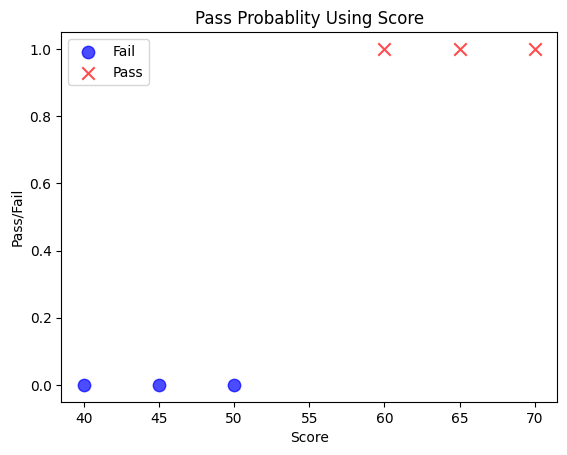

In [21]:
#Visualize the data
plt.scatter(x[y==0],y[y==0],color="blue",marker='o',alpha=0.7,s=80,label="Fail")
plt.scatter(x[y==1],y[y==1],color="red",marker='x',alpha=0.7,s=80,label="Pass")
plt.xlabel('Score')
plt.ylabel('Pass/Fail')
plt.legend()
plt.title('Pass Probablity Using Score')
plt.plot()

In [70]:
def sigmoid(z):
  return 1/(1+np.exp(-z))
def cost(x,y,w,b):
  m=x.shape[0]
  y_pred=sigmoid(x@w+b)
  cost=(-1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
  return cost
def gradient_descent(x,y,w,b,a,iter):
  m=x.shape[0]
  for i in range(iter):
    y_pred=sigmoid(x@w+b)
    dj_dw=(1/m)*x.T@(y_pred-y)
    dj_db=(1/m)*np.sum(y_pred-y)

    w=w-a*dj_dw
    b=b-a*dj_db
    if i % 10000 == 0:
            print(f"Iteration {i}, Cost: {cost(x, y, w, b):.4f}")

  return w,b

In [72]:
x_copy,y_copy=x.reshape(-1,1),y.reshape(-1,1)

w=np.zeros((x_copy.shape[1],1))
b=0
alpha=1e-1
iteration=100000
w_final,b_final=gradient_descent(x_copy,y_copy,w,b,alpha,iteration)

print("Final weight:", w_final)
print("Final bias:", b_final)
print("Decision boundary (score threshold):", -b_final / w_final[0])

Iteration 0, Cost: 11.2500
Iteration 10000, Cost: 0.0060
Iteration 20000, Cost: 0.0057
Iteration 30000, Cost: 0.0055
Iteration 40000, Cost: 0.0052
Iteration 50000, Cost: 0.0050
Iteration 60000, Cost: 0.0048
Iteration 70000, Cost: 0.0046
Iteration 80000, Cost: 0.0044
Iteration 90000, Cost: 0.0043
Final weight: [[0.88010747]]
Final bias: -48.31250854724782
Decision boundary (score threshold): [54.89387408]


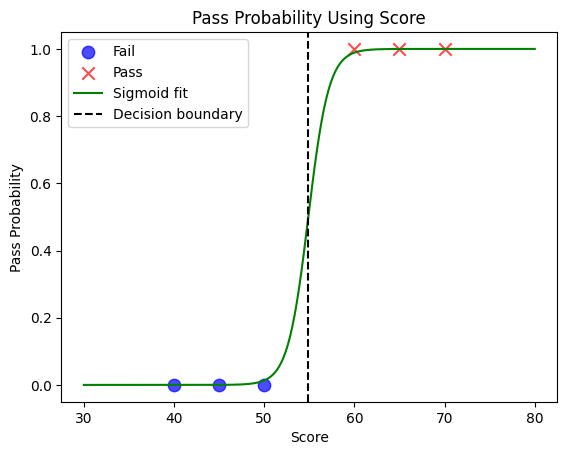

In [75]:
#Visualize
plt.scatter(x[y==0], y[y==0], color="blue", marker='o', alpha=0.7, s=80, label="Fail")
plt.scatter(x[y==1], y[y==1], color="red", marker='x', alpha=0.7, s=80, label="Pass")

# Smooth sigmoid curve
x_range = np.linspace(30, 80, 200).reshape(-1,1)
y_range = sigmoid(x_range @ w_final + b_final)
plt.plot(x_range, y_range, color="green", label="Sigmoid fit")

# Decision boundary (vertical line at cutoff score)
decision_boundary = -b_final / w_final[0]
plt.axvline(x=decision_boundary, color="black", linestyle="--", label="Decision boundary")

# Labels and legend
plt.xlabel('Score')
plt.ylabel('Pass Probability')
plt.legend()
plt.title('Pass Probability Using Score')
plt.show()

In [77]:
def prediction(input_, w, b):
    y = w * input_ + b
    if sigmoid(y) >= 0.5:
        return "Pass"
    else:
        return "Fail"

In [84]:
data=float(input("Enter your score: "))
res=prediction(data,w_final,b_final)
if res == 'Pass':
  print(f"Congra you have {res} 👏")
else:
  print(f"Sorry you have {res} 😔")

Enter your score: 54.89387408
Congra you have Pass 👏
